In [300]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import pyplot
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.simplefilter(action='ignore')

In [302]:
# Read CSV train data file into DataFrame
df = pd.read_csv('C:/Users/mishrap6/OneDrive - Zimmer Biomet/Downloads/DS1_C9_S7_Project_AbsenteeismAtWork_Data.csv', delimiter =';')

df.to_csv("C:/Users/mishrap6/OneDrive - Zimmer Biomet/Downloads/AbsenteeismAtWork_Data1.csv", index=False)
# preview the data
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [304]:
df.isnull().sum()


ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [306]:
df_copy = df
df_copy.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [310]:
import pandas as pd
import re

# Function to check for special characters
def check_special_characters(df):
    special_char_pattern = re.compile(r'[^a-zA-Z0-9\s]')  # Match anything that's not alphanumeric or whitespace
    for col in df.columns:
        print(f"\nChecking column: {col}")
        df[col] = df[col].astype(str)  # Ensure all values are strings
        contains_special = df[col].apply(lambda x: bool(special_char_pattern.search(x)))
        if contains_special.any():
            print("Rows with special characters:")
            print(df[contains_special])
        else:
            print("No special characters found.")

check_special_characters(df_copy)



Checking column: ID
No special characters found.

Checking column: Reason for absence
No special characters found.

Checking column: Month of absence
No special characters found.

Checking column: Day of the week
No special characters found.

Checking column: Seasons
No special characters found.

Checking column: Transportation expense
No special characters found.

Checking column: Distance from Residence to Work
No special characters found.

Checking column: Service time
No special characters found.

Checking column: Age
No special characters found.

Checking column: Work load Average/day 
Rows with special characters:
     ID Reason for absence Month of absence Day of the week Seasons  \
0    11                 26                7               3       1   
1    36                  0                7               3       1   
2     3                 23                7               4       1   
3     7                  7                7               5       1   
4    11         

In [312]:
columns_spl = df_copy.columns[df.apply(lambda col: col.astype(str).str.contains('\?\r^\s*\?\s*$\ ').any())]
print("Columns with spl char :", columns_spl)

Columns with spl char : Index([], dtype='object')


In [314]:
df_copy.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740,740,740,740,740,740,740,740,740,740,...,740,740,740,740,740,740,740,740,740,740
unique,36,28,13,5,4,24,25,18,22,38,...,2,4,5,2,2,6,26,14,17,19
top,3,23,3,2,4,179,26,18,28,222.196,...,0,1,0,1,0,0,89,170,31,8
freq,113,149,87,161,195,180,128,147,117,36,...,700,611,298,420,686,460,113,166,147,208


In [316]:
df.isnull().sum()
df.shape

(740, 21)

In [284]:
df_copy.dtypes

ID                                 object
Reason for absence                 object
Month of absence                   object
Day of the week                    object
Seasons                            object
Transportation expense             object
Distance from Residence to Work    object
Service time                       object
Age                                object
Work load Average/day              object
Hit target                         object
Disciplinary failure               object
Education                          object
Son                                object
Social drinker                     object
Social smoker                      object
Pet                                object
Weight                             object
Height                             object
Body mass index                    object
Absenteeism time in hours          object
dtype: object

In [318]:
for col in df_copy.columns:
    print(f"{col} unique values:", df_copy[col].unique())

ID unique values: ['11' '36' '3' '7' '10' '20' '14' '1' '24' '6' '33' '18' '30' '2' '19'
 '27' '34' '5' '15' '29' '28' '13' '22' '17' '31' '23' '32' '9' '26' '21'
 '8' '25' '12' '16' '4' '35']
Reason for absence unique values: ['26' '0' '23' '7' '22' '19' '1' '11' '14' '21' '10' '13' '28' '18' '25'
 '24' '6' '27' '17' '8' '12' '5' '9' '15' '4' '3' '2' '16']
Month of absence unique values: ['7' '8' '9' '10' '11' '12' '1' '2' '3' '4' '5' '6' '0']
Day of the week unique values: ['3' '4' '5' '6' '2']
Seasons unique values: ['1' '4' '2' '3']
Transportation expense unique values: ['289' '118' '179' '279' '361' '260' '155' '235' '246' '189' '248' '330'
 '157' '291' '184' '225' '369' '388' '378' '228' '300' '268' '231' '233']
Distance from Residence to Work unique values: ['36' '13' '51' '5' '52' '50' '12' '11' '25' '29' '16' '27' '42' '10' '20'
 '31' '26' '17' '22' '15' '49' '48' '14' '35' '45']
Service time unique values: ['13' '18' '14' '3' '11' '16' '4' '6' '12' '7' '10' '9' '17' '29' '8' 

In [320]:
df_copy.columns = df_copy.columns.str.strip()

In [322]:
# List of columns to convert to int64
int_cols = [
    "ID", "Reason for absence", "Month of absence", "Day of the week", "Seasons",
    "Transportation expense", "Distance from Residence to Work", "Service time",
    "Age", "Hit target", "Disciplinary failure", "Education", "Son", 
    "Social drinker", "Social smoker", "Pet", "Weight", "Height", 
    "Body mass index", "Absenteeism time in hours"
]

# List of columns to convert to float64
float_cols = ["Work load Average/day"]

# Convert columns to appropriate types
df_copy[int_cols] = df_copy[int_cols].apply(pd.to_numeric, errors='coerce', downcast='integer')
df_copy[float_cols] = df_copy[float_cols].apply(pd.to_numeric, errors='coerce', downcast='float')

# Verify the conversions
print(df_copy.dtypes)


ID                                    int8
Reason for absence                    int8
Month of absence                      int8
Day of the week                       int8
Seasons                               int8
Transportation expense               int16
Distance from Residence to Work       int8
Service time                          int8
Age                                   int8
Work load Average/day              float32
Hit target                            int8
Disciplinary failure                  int8
Education                             int8
Son                                   int8
Social drinker                        int8
Social smoker                         int8
Pet                                   int8
Weight                                int8
Height                               int16
Body mass index                       int8
Absenteeism time in hours             int8
dtype: object


In [290]:
# List of columns to convert to category
category_cols = [
    'Reason for absence', 'Disciplinary failure', 'Education', 'Social drinker', 
    'Social smoker', 'Son', 'Pet', 'Seasons', 'Month of absence', 'Day of the week'
]

# Convert to category type
df_copy[category_cols] = df_copy[category_cols].apply(lambda x: x.astype('category'))

# Verify the conversion
print(df_copy.dtypes)

ID                                     int8
Reason for absence                 category
Month of absence                   category
Day of the week                    category
Seasons                            category
Transportation expense                int16
Distance from Residence to Work        int8
Service time                           int8
Age                                    int8
Work load Average/day               float32
Hit target                             int8
Disciplinary failure               category
Education                          category
Son                                category
Social drinker                     category
Social smoker                      category
Pet                                category
Weight                                 int8
Height                                int16
Body mass index                        int8
Absenteeism time in hours              int8
dtype: object


<Axes: xlabel='Age', ylabel='Absenteeism time in hours'>

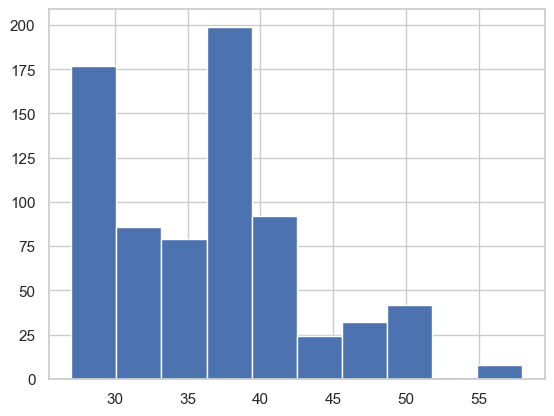

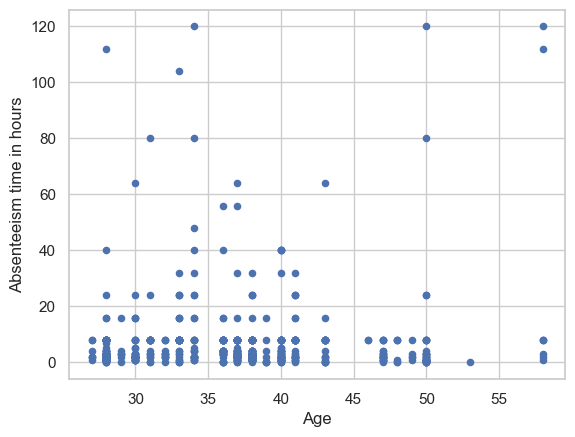

In [154]:
# Distribution of categorical variables
df_copy['Education'].value_counts()  # Education level distribution
df_copy['Social drinker'].value_counts()  # Social drinker distribution
df_copy['Social smoker'].value_counts()  # Social smoker distribution
df_copy['Pet'].value_counts()  # Pet ownership distribution
df_copy['Disciplinary failure'].value_counts()  # Disciplinary failure distribution
df_copy['Reason for absence'].value_counts()
df_copy['Month of absence'].value_counts()
df_copy['Seasons'].value_counts()

# Age distribution
df_copy['Age'].hist(bins=10)

# Relationship between age and absenteeism
df_copy.plot(x='Age', y='Absenteeism time in hours', kind='scatter')

In [324]:
# Label encoding for 'Social smoker', 'Social drinker', etc.
df_copy['Social smoker'] = df['Social smoker'].map({0: 'No', 1: 'Yes'})
df_copy['Social drinker'] = df['Social drinker'].map({0: 'No', 1: 'Yes'})
df_copy['Education'] = df['Education'].map({1: 'High School', 2: 'Graduate', 3: 'Postgraduate', 4: 'Master/Doctor'})
df_copy['Disciplinary failure'] = df['Disciplinary failure'].map({0: 'No', 1: 'Yes'})
df_copy['Seasons'] = df['Seasons'].map({1: 'Summer', 2: 'Autumn', 3: 'Winter', 4: 'Spring'})
#df_copy['Day of the week'] = df['Day of the week'].map({1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday'})

In [326]:
df_copy.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,Summer,289,36,13,33,239.554001,...,No,High School,2,Yes,No,1,90,172,30,4
1,36,0,7,3,Summer,118,13,18,50,239.554001,...,Yes,High School,1,Yes,No,0,98,178,31,0
2,3,23,7,4,Summer,179,51,18,38,239.554001,...,No,High School,0,Yes,No,0,89,170,31,2
3,7,7,7,5,Summer,279,5,14,39,239.554001,...,No,High School,2,Yes,Yes,0,68,168,24,4
4,11,23,7,5,Summer,289,36,13,33,239.554001,...,No,High School,2,Yes,No,1,90,172,30,2


### EDA 

#### Task 2. Understanding absenteeism pattern.

In [328]:
# Group by Age and calculate mean absenteeism
age_absenteeism = df_copy.groupby('Age')['Absenteeism time in hours'].mean().sort_values()
print("Average Absenteeism by Age:")
print(age_absenteeism)

Average Absenteeism by Age:
Age
53     0.000000
47     3.041667
49     3.200000
32     3.692308
39     3.750000
27     3.857143
48     4.166667
38     4.265487
29     4.428571
30     5.500000
28     5.564103
37     5.961538
40     6.534483
36     6.920000
43     7.791667
46     8.000000
41     8.088235
50     8.837838
31     9.863636
33    10.549020
34    16.413793
58    32.750000
Name: Absenteeism time in hours, dtype: float64


In [179]:
# Group by Education level
education_absenteeism = df_copy.groupby('Education')['Absenteeism time in hours'].mean().sort_values()
print("\nAverage Absenteeism by Education Level:")
print(education_absenteeism)

# Group by Son
son_absenteeism = df_copy.groupby('Son')['Absenteeism time in hours'].mean().sort_values()
print("\nAverage Absenteeism by Number of Sons:")
print(son_absenteeism)

# Group by Reason for Absence
reason_absenteeism = df_copy.groupby('Reason for absence')['Absenteeism time in hours'].mean().sort_values()
print("\nAverage Absenteeism by Reason for Absence:")
print(reason_absenteeism)


Average Absenteeism by Education Level:
Education
Master/Doctor    5.250000
Postgraduate     5.265823
Graduate         6.391304
High School      7.189853
Name: Absenteeism time in hours, dtype: float64

Average Absenteeism by Number of Sons:
Son
0     5.385906
1     6.030568
4     7.285714
2    10.570513
3    12.200000
Name: Absenteeism time in hours, dtype: float64

Average Absenteeism by Reason for Absence:
Reason for absence
0      0.000000
16     2.000000
27     2.275362
23     2.845638
28     2.991071
25     3.483871
4      4.500000
8      5.333333
21     5.833333
5      6.333333
26     7.272727
22     7.710526
24     8.000000
15     8.000000
17     8.000000
3      8.000000
14     8.789474
7     10.000000
18    10.333333
10    11.040000
1     11.375000
11    11.423077
13    15.309091
19    18.225000
6     21.375000
12    23.375000
2     24.000000
9     42.000000
Name: Absenteeism time in hours, dtype: float64


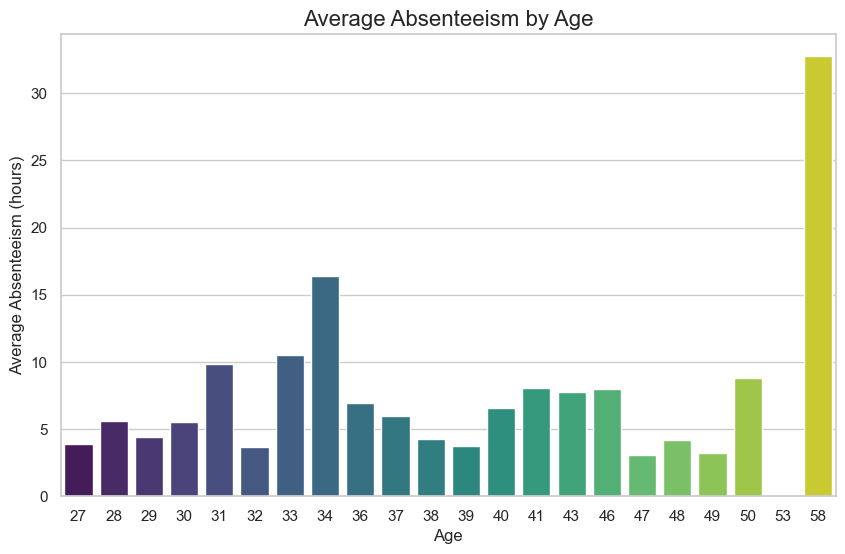

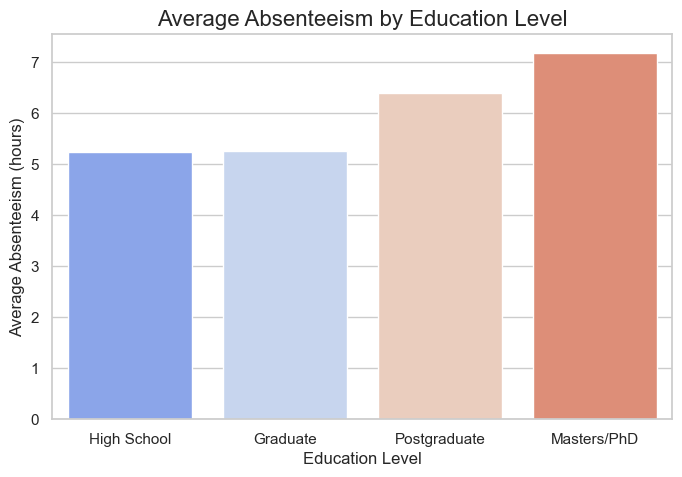

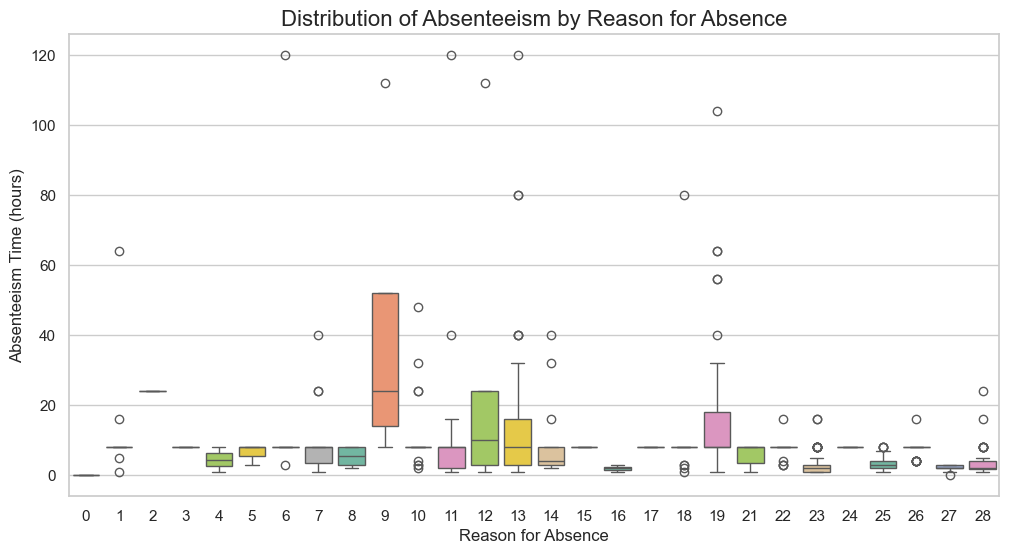

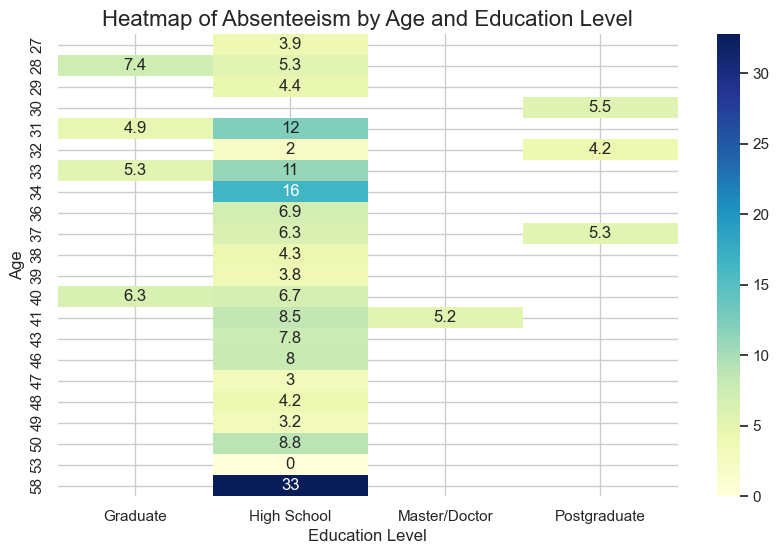

In [187]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Bar Plot: Absenteeism by Age
plt.figure(figsize=(10, 6))
sns.barplot(x=age_absenteeism.index, y=age_absenteeism.values, palette="viridis")
plt.title("Average Absenteeism by Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Average Absenteeism (hours)", fontsize=12)
plt.xticks
plt.show()

# Bar Plot: Absenteeism by Education Level
plt.figure(figsize=(8, 5))
sns.barplot(x=education_absenteeism.index, y=education_absenteeism.values, palette="coolwarm")
plt.title("Average Absenteeism by Education Level", fontsize=16)
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Average Absenteeism (hours)", fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3], labels=["High School", "Graduate", "Postgraduate", "Masters/PhD"])
plt.show()

# Box Plot: Absenteeism by Reason
plt.figure(figsize=(12, 6))
sns.boxplot(x='Reason for absence', y='Absenteeism time in hours', data=df, palette="Set2")
plt.title("Distribution of Absenteeism by Reason for Absence", fontsize=16)
plt.xlabel("Reason for Absence", fontsize=12)
plt.ylabel("Absenteeism Time (hours)", fontsize=12)
plt.xticks(rotation=0)
plt.show()

# Heatmap: Demographics vs Absenteeism
demographics = df.groupby(['Age', 'Education'])['Absenteeism time in hours'].mean().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(demographics, cmap="YlGnBu", annot=True)
plt.title("Heatmap of Absenteeism by Age and Education Level", fontsize=16)
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.show()


#### Task 3. Analyse reason for ansenteeism.


In [192]:
# Frequency count of reasons for absence
reason_counts = df_copy['Reason for absence'].value_counts()
print("Most Frequent Reasons for absence:")
print(reason_counts)

# Percentage distribution
reason_percentage = reason_counts / reason_counts.sum() * 100
print("\nPercentage Distribution of Reasons for absence:")
print(reason_percentage)



Most Frequent Reasons for absence:
Reason for absence
23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
6       8
12      8
21      6
8       6
9       4
5       3
16      3
24      3
15      2
4       2
3       1
2       1
17      1
Name: count, dtype: int64

Percentage Distribution of Reasons for absence:
Reason for absence
23    20.135135
28    15.135135
27     9.324324
13     7.432432
0      5.810811
19     5.405405
22     5.135135
26     4.459459
25     4.189189
11     3.513514
10     3.378378
18     2.837838
14     2.567568
1      2.162162
7      2.027027
6      1.081081
12     1.081081
21     0.810811
8      0.810811
9      0.540541
5      0.405405
16     0.405405
24     0.405405
15     0.270270
4      0.270270
3      0.135135
2      0.135135
17     0.135135
Name: count, dtype: float64


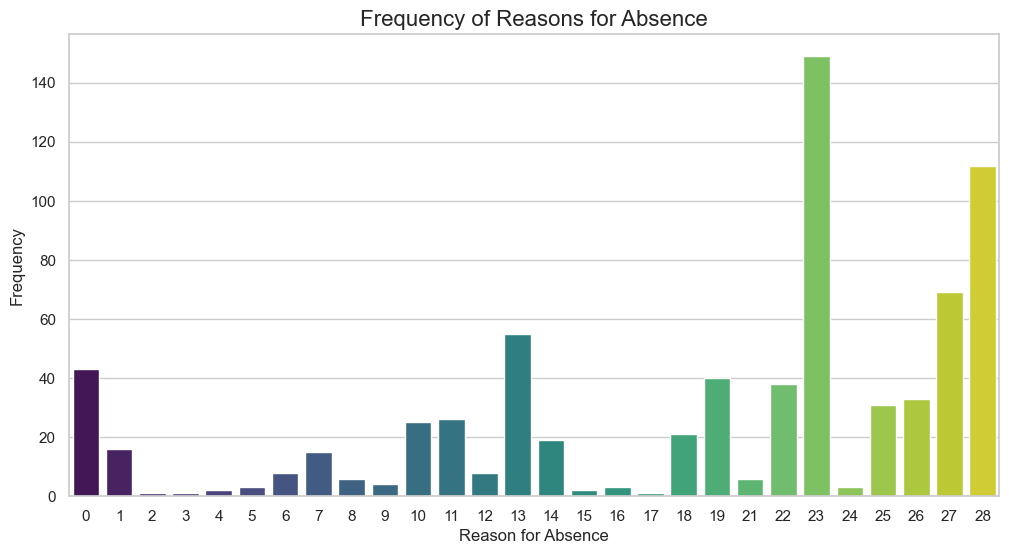

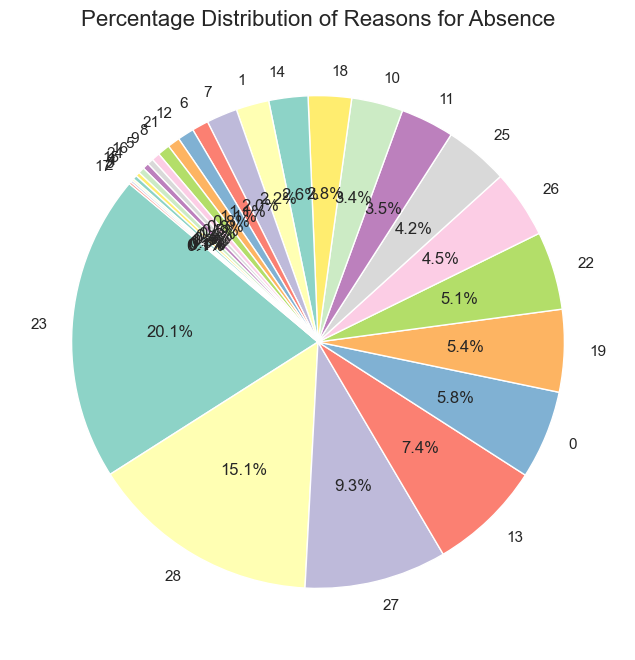

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Plot: Frequency of Reasons for Absence
plt.figure(figsize=(12, 6))
sns.barplot(x=reason_counts.index, y=reason_counts.values, palette="viridis")
plt.title("Frequency of Reasons for Absence", fontsize=16)
plt.xlabel("Reason for Absence", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=0)
plt.show()

# Pie Chart: Distribution of Reasons
plt.figure(figsize=(16, 8))
plt.pie(reason_counts, labels=reason_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title("Percentage Distribution of Reasons for Absence", fontsize=16)
plt.show()


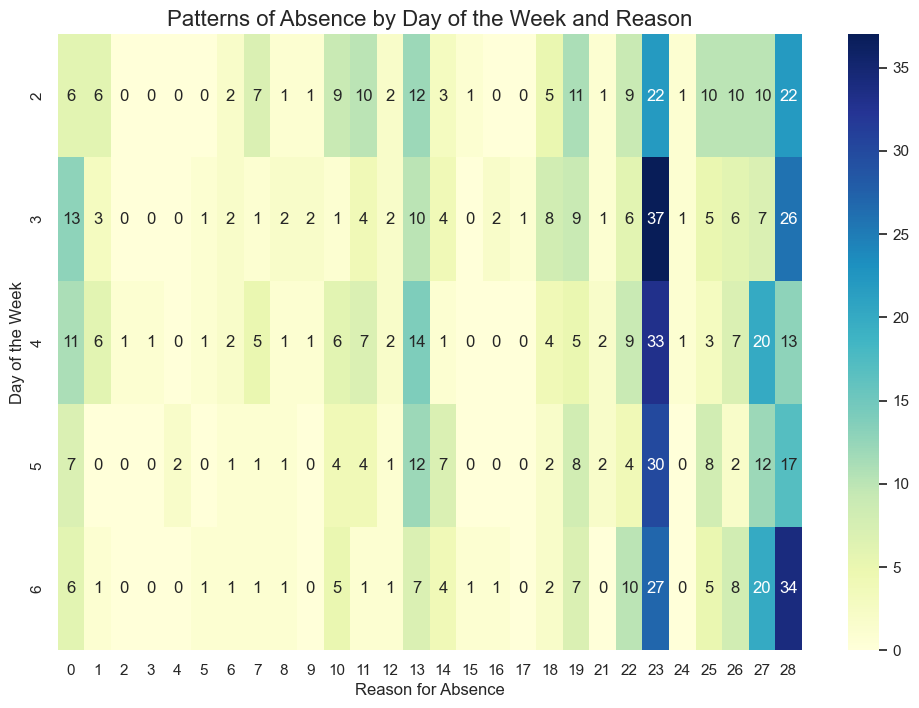

In [204]:
# Grouping by 'Day of Week' and 'Reason for absence'
day_reason_pattern = df_copy.groupby(['Day of the week', 'Reason for absence']).size().unstack(fill_value=0)

# Heatmap for day and reason patterns
plt.figure(figsize=(12, 8))
sns.heatmap(day_reason_pattern, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Patterns of Absence by Day of the Week and Reason", fontsize=16)
plt.xlabel("Reason for Absence", fontsize=12)
plt.ylabel("Day of the Week", fontsize=12)
plt.show()


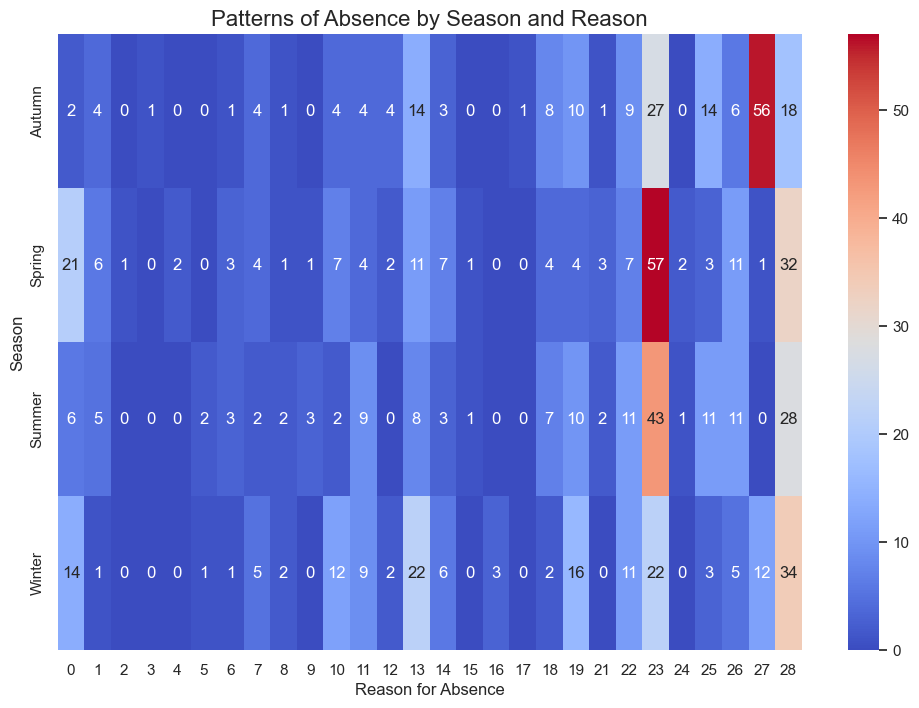

In [210]:
# Grouping by 'Season' and 'Reason for Absence'
season_reason_pattern = df_copy.groupby(['Seasons', 'Reason for absence']).size().unstack(fill_value=0)

# Heatmap for season and reason patterns
plt.figure(figsize=(12, 8))
sns.heatmap(season_reason_pattern, cmap="coolwarm", annot=True, fmt="d")
plt.title("Patterns of Absence by Season and Reason", fontsize=16)
plt.xlabel("Reason for Absence", fontsize=12)
plt.ylabel("Season", fontsize=12)
plt.show()


#### Task 4 : Prediction of the duration of an employee's absence.

##### Multiple linear regression :

Target : Absenteeism time in hours
Features : Reason for Absence, Disciplinary Failure, Distance from Residence to Work, Body Mass Index (BMI)

In [338]:
# Rreverting back to the original labels from categorical to numerical values for linear regression model.

df_copy['Social smoker'] = df_copy['Social smoker'].map({'No': 0, 'Yes': 1})
df_copy['Social drinker'] = df_copy['Social drinker'].map({'No': 0, 'Yes': 1})
df_copy['Education'] = df_copy['Education'].map({'High School': 1, 'Graduate': 2, 'Postgraduate': 3, 'Master/Doctor': 4})
df_copy['Disciplinary failure'] = df_copy['Disciplinary failure'].map({'No': 0, 'Yes': 1})
df_copy['Seasons'] = df_copy['Seasons'].map({'Summer': 1, 'Autumn': 2, 'Winter': 3, 'Spring': 4})
df_copy['Day of the week'] = df_copy['Day of the week'].map({'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5})


In [340]:
df_copy.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554001,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554001,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554001,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554001,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554001,...,0,1,2,1,0,1,90,172,30,2


In [342]:
# Splitting the Data :

# Define features and target variable
X = df_copy[['Reason for absence', 'Disciplinary failure', 'Distance from Residence to Work', 'Body mass index']]
y = df_copy['Absenteeism time in hours']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [346]:
# Model Selection and Training

from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


In [348]:
# Evaluate the Model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 4.9473696880893465
Mean Squared Error: 97.9501006000378
R-squared: 0.10115837569828223


In [350]:
#Feature Importance
# Print model coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
print(coefficients)


                           Feature  Coefficient
2  Distance from Residence to Work    -0.047021
3                  Body mass index    -0.083272
0               Reason for absence    -0.545816
1             Disciplinary failure   -18.636302


#### Interpretation of Absenteeism time in hours:

This coefficient suggests that disciplinary failure has a high, negative impact on absenteeism.

Here the model explains 10.12% of the variation in absenteeism time. In other words, only about 10% of the fluctuation in absenteeism time is captured by the model based on the features used.
The remaining 89.88% of the variance in absenteeism time is unexplained by the model and could be influenced by other factors that are not included in your model, so we should check model performnace by Logistic regression.

Hence, Logistic regression could then be applied to predict the probability of High absenteeism based on the factors like Reason for absence, Disciplinary failure, Distance from residence to work, Obesity, etc.